In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp

In [2]:
data = pd.read_excel('TV Set 77.xlsx')

In [3]:
X = data.iloc[:, 1:12]

In [4]:
y = data['2-class']

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [6]:
cv = RepeatedKFold(n_splits=10, n_repeats=15, random_state=1)

In [7]:
model = RandomForestClassifier()

In [8]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.57303371, 0.57303371, 0.73033708, 0.68539326, 0.73863636,
       0.65909091, 0.625     , 0.73863636, 0.64772727, 0.67045455,
       0.71910112, 0.62921348, 0.61797753, 0.74157303, 0.64772727,
       0.69318182, 0.69318182, 0.64772727, 0.68181818, 0.63636364,
       0.66292135, 0.68539326, 0.65168539, 0.64044944, 0.70454545,
       0.625     , 0.69318182, 0.65909091, 0.69318182, 0.625     ,
       0.69662921, 0.66292135, 0.6741573 , 0.64044944, 0.625     ,
       0.77272727, 0.625     , 0.68181818, 0.68181818, 0.59090909,
       0.73033708, 0.62921348, 0.69662921, 0.65168539, 0.63636364,
       0.59090909, 0.71590909, 0.69318182, 0.67045455, 0.625     ,
       0.69662921, 0.58426966, 0.65168539, 0.76404494, 0.65909091,
       0.56818182, 0.59090909, 0.64772727, 0.60227273, 0.72727273,
       0.69662921, 0.66292135, 0.62921348, 0.71910112, 0.625     ,
       0.69318182, 0.61363636, 0.65909091, 0.59090909, 0.60227273,
       0.65168539, 0.66292135, 0.73033708, 0.66292135, 0.65909

In [9]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.662 (0.045)


In [10]:
test = pd.read_excel('Test Set 20.xlsx')
test.head()

,pdb,Hbond,Hphob,consurf,asa,Electron-ion interaction potential,Hydrophobicity,Number of electrostatic charge,Number of potential hydrogen bonds,Hydrophilicity,Propensity,Isoelectric points,3-class,2-class,Number of atoms,Mass,Expected number of contacts within 14 Å sphere
0,1a4y,1,0,6,0.360,0.0959,-1.76,1,4,-0.5,0.27,5.405,2,1,11,156.2,-0.93
1,1a4y,2,0,5,0.994,0.0242,-0.40,0,4,-0.5,0.41,5.565,0,0,10,137.1,1.28
2,1a4y,3,0,7,0.173,0.0761,-0.69,0,4,0.2,-0.11,5.650,0,0,9,128.1,-2.76
3,1a4y,1,0,3,0.501,0.0959,-1.76,1,4,-0.5,0.27,5.405,0,0,11,156.2,-0.93
4,1a4y,4,0,8,0.690,0.0959,-1.76,1,4,-0.5,0.27,5.405,0,0,11,156.2,-0.93


In [11]:
X_test = test.iloc[:, 1:12]

In [12]:
y_test  = test['2-class']

In [13]:
model.fit(X,y)

RandomForestClassifier()

In [14]:
y_pred =model.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.691358024691358

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6890083316200155

C:\temp\ipykernel_16368\552350008.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sn.heatmap(data.corr(), cmap="YlGnBu", annot=True)


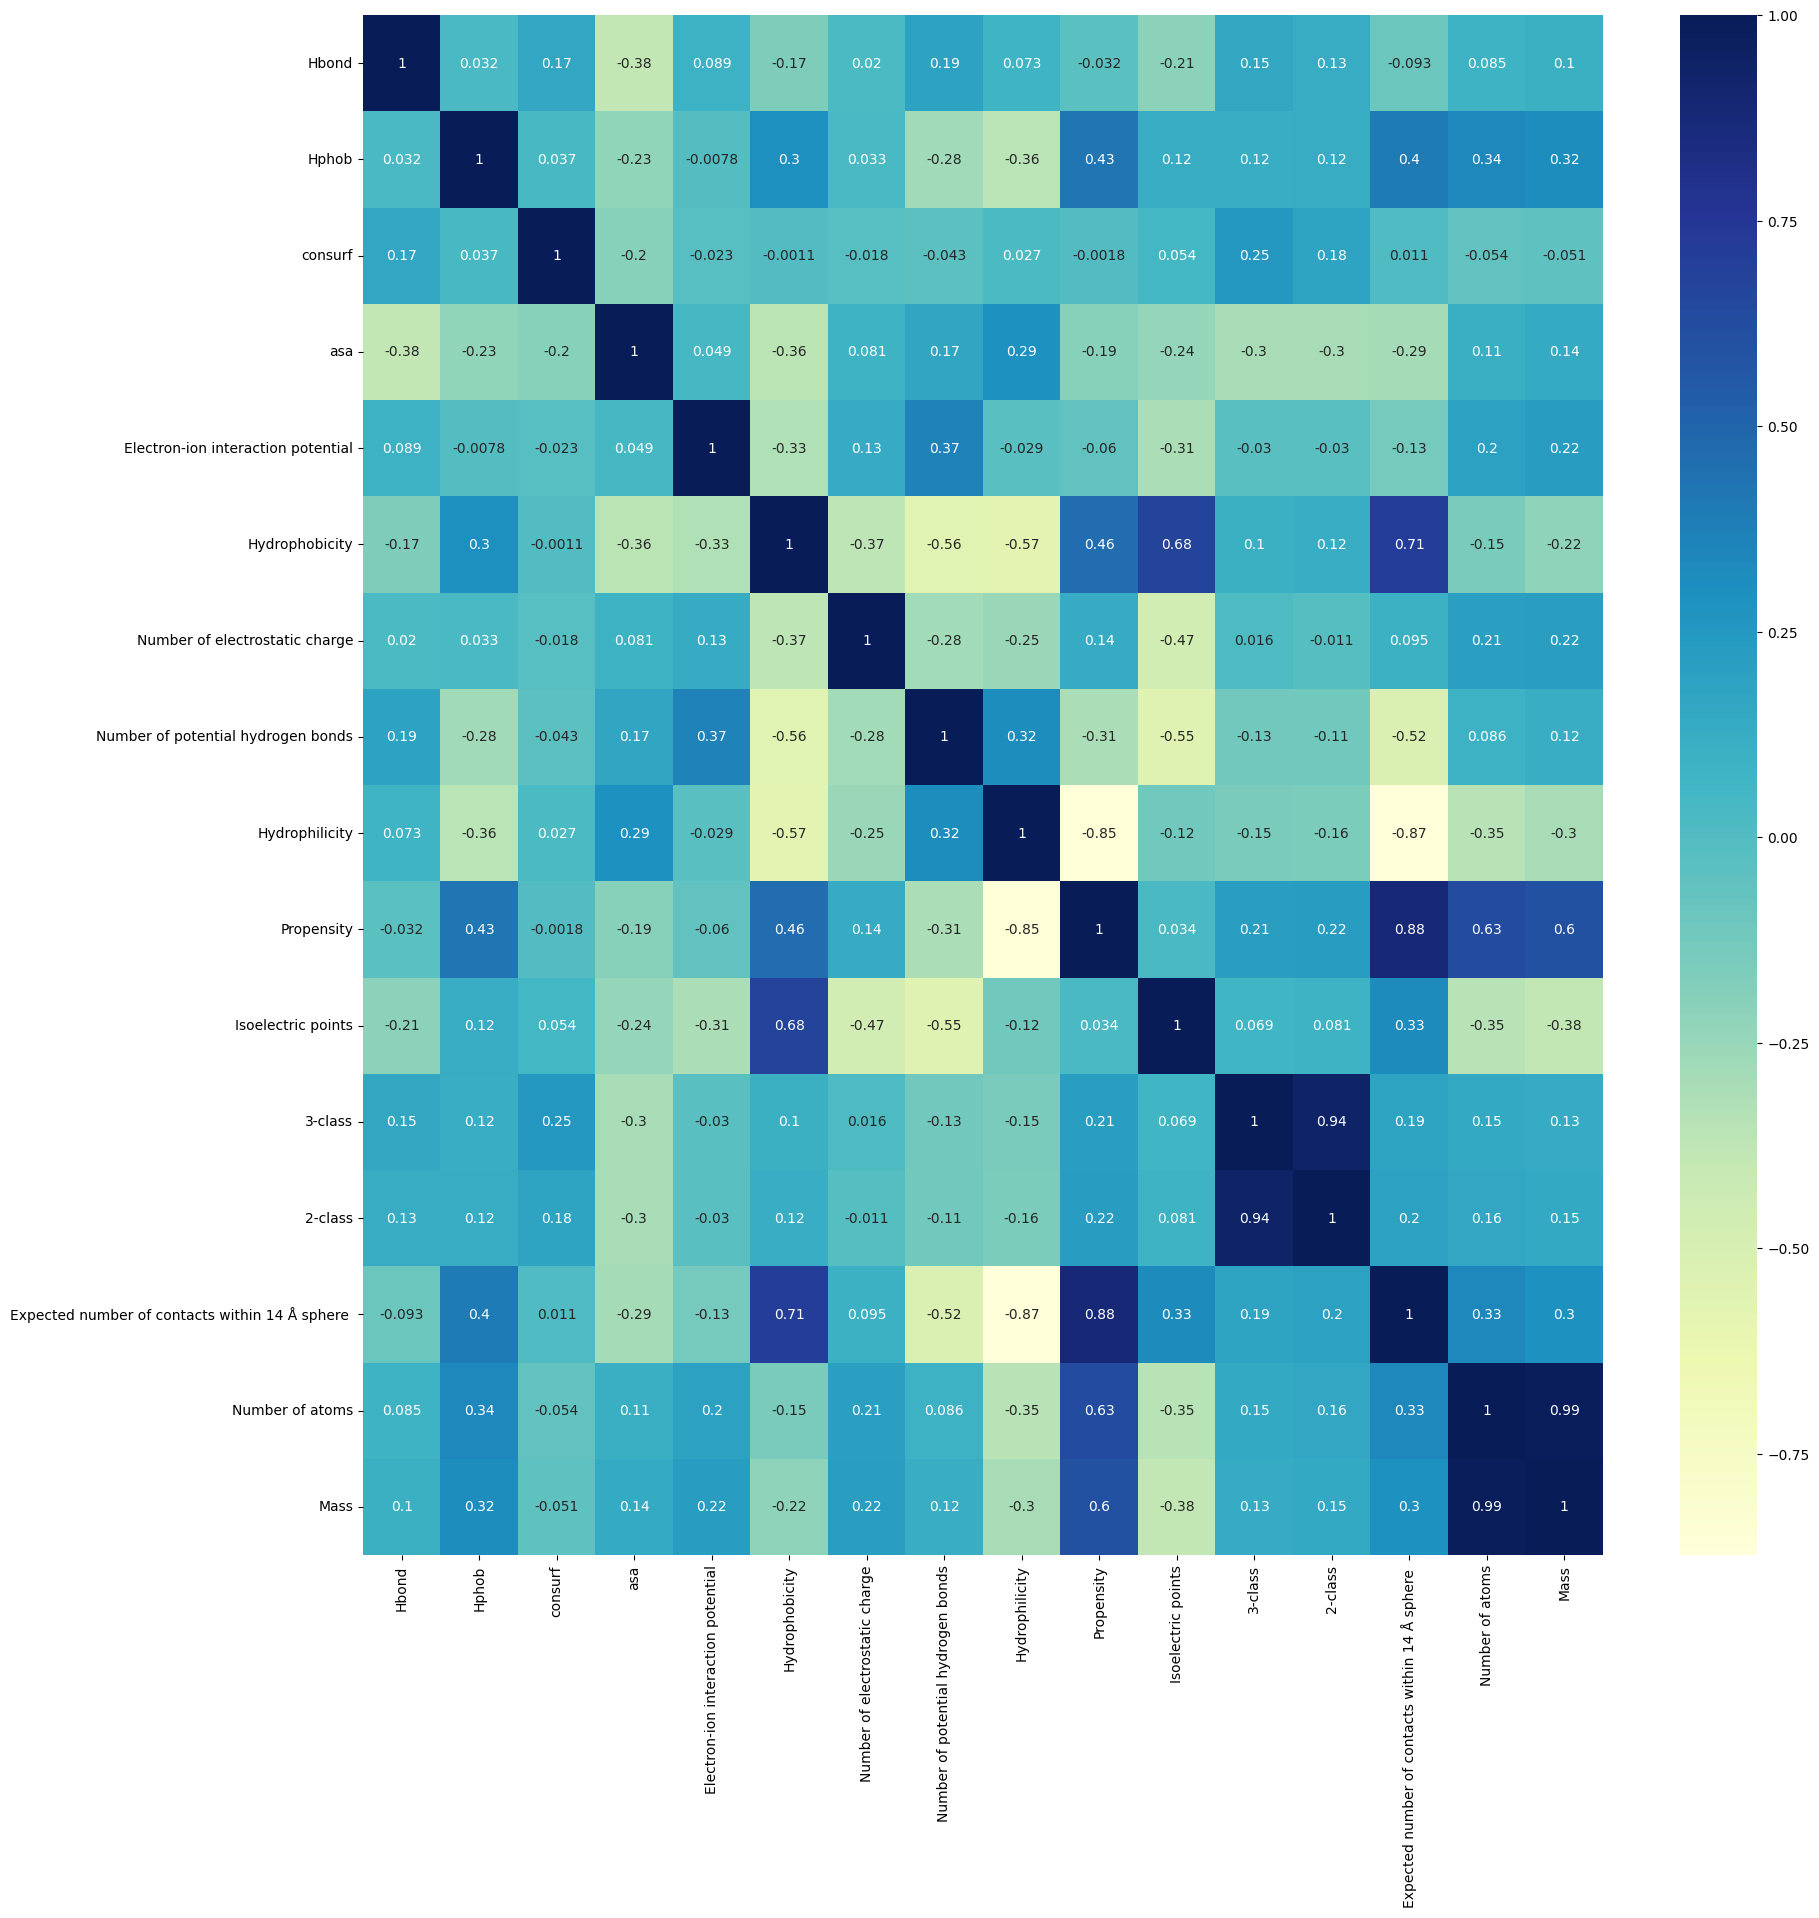

In [18]:
mp.figure(figsize=(20, 20))
dataplot = sn.heatmap(data.corr(), cmap="YlGnBu", annot=True)

mp.show()